In [2]:
# Loading the MBTA bus stops data
import pandas as pd
mbta_data = pd.read_csv("/Users/lijunyi/ds-boston-transit-performance/fa23-team-f/deliverables/extension/stops.csv")

# Performing an initial examination of the data
mbta_data_info = mbta_data.info()
mbta_data_head = mbta_data.head()

# Analyzing the distribution of wheelchair accessibility
wheelchair_distribution = mbta_data['wheelchair_boarding'].value_counts()

mbta_data_info, mbta_data_head, wheelchair_distribution



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711 entries, 0 to 9710
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              9711 non-null   object 
 1   stop_code            7108 non-null   float64
 2   stop_name            9711 non-null   object 
 3   stop_desc            2706 non-null   object 
 4   platform_code        309 non-null    object 
 5   platform_name        760 non-null    object 
 6   stop_lat             8860 non-null   float64
 7   stop_lon             8860 non-null   float64
 8   zone_id              7644 non-null   object 
 9   stop_address         305 non-null    object 
 10  stop_url             7766 non-null   object 
 11  level_id             2378 non-null   object 
 12  location_type        9711 non-null   int64  
 13  parent_station       2668 non-null   object 
 14  wheelchair_boarding  9711 non-null   int64  
 15  municipality         9711 non-null   o

(None,
   stop_id  stop_code                      stop_name stop_desc platform_code  \
 0       1        1.0   Washington St opp Ruggles St       NaN           NaN   
 1      10       10.0  Theo Glynn Way @ Newmarket Sq       NaN           NaN   
 2   10000    10000.0       Tremont St opp Temple Pl       NaN           NaN   
 3   10003    10003.0       Albany St opp Randall St       NaN           NaN   
 4   10005    10005.0     Albany St opp E Concord St       NaN           NaN   
 
   platform_name   stop_lat   stop_lon              zone_id stop_address  \
 0           NaN  42.330957 -71.082754  ExpressBus-Downtown          NaN   
 1           NaN  42.330555 -71.068787             LocalBus          NaN   
 2           NaN  42.355692 -71.062911             LocalBus          NaN   
 3           NaN  42.331591 -71.076237             LocalBus          NaN   
 4           NaN  42.335017 -71.071280             LocalBus          NaN   
 
                            stop_url level_id  locati

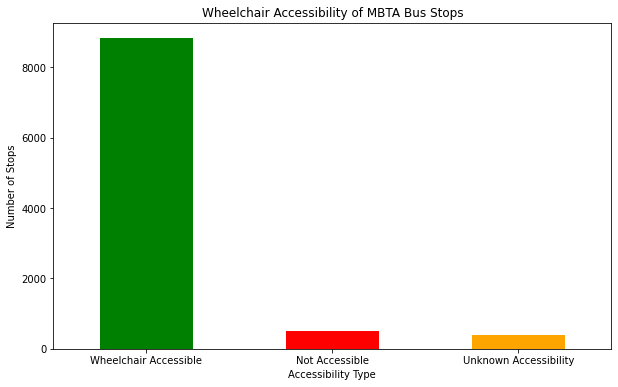

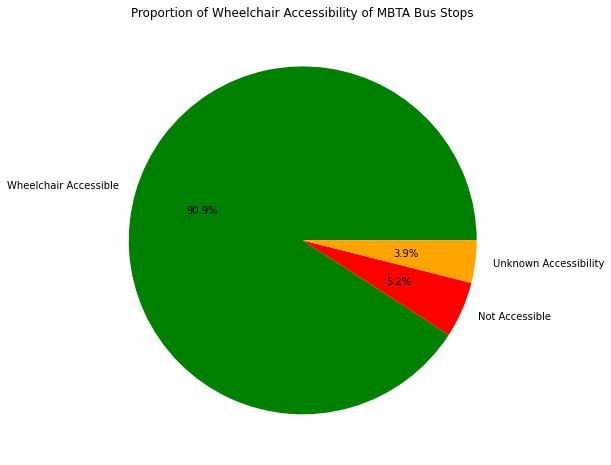

In [5]:
import matplotlib.pyplot as plt
# Preparing data for bar and pie chart
accessibility_counts = mbta_data['wheelchair_boarding'].value_counts()
accessibility_labels = ['Wheelchair Accessible', 'Not Accessible', 'Unknown Accessibility']

# Creating bar chart
plt.figure(figsize=(10, 6))
accessibility_counts.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Wheelchair Accessibility of MBTA Bus Stops')
plt.xlabel('Accessibility Type')
plt.ylabel('Number of Stops')
plt.xticks(ticks=[0, 1, 2], labels=accessibility_labels, rotation=0)
plt.show()

# Creating pie chart
plt.figure(figsize=(8, 8))
accessibility_counts.plot(kind='pie', labels=accessibility_labels, colors=['green', 'red', 'orange'], autopct='%1.1f%%')
plt.title('Proportion of Wheelchair Accessibility of MBTA Bus Stops')
plt.ylabel('')  # Hiding the default y-label
plt.show()


A significant majority of stops are wheelchair accessible, as indicated by the green segments in both charts.

A small fraction of stops are not accessible (red), and a relatively minor portion has an unknown status (orange).


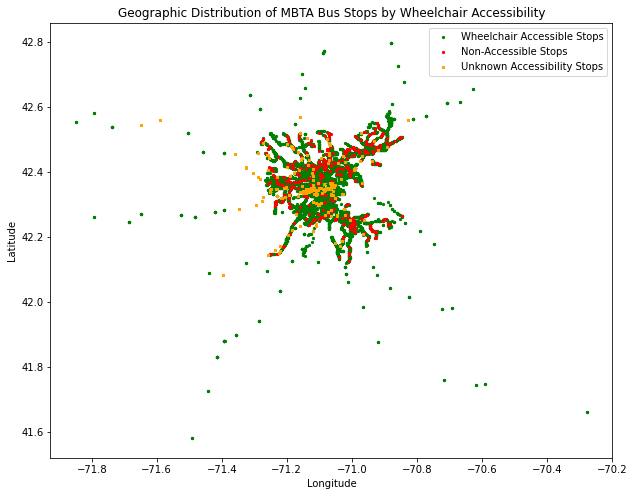

In [8]:
import geopandas as gpd
# Correcting the geographic visualization for wheelchair accessibility
gdf_mbta = gpd.GeoDataFrame(mbta_data, geometry=gpd.points_from_xy(mbta_data.stop_lon, mbta_data.stop_lat))

# Filtering for wheelchair-accessible stops
accessible_stops = gdf_mbta[gdf_mbta['wheelchair_boarding'] == 1]
non_accessible_stops = gdf_mbta[gdf_mbta['wheelchair_boarding'] == 0]
unknown_accessibility_stops = gdf_mbta[gdf_mbta['wheelchair_boarding'] == 2]
# Plotting the locations
fig, ax = plt.subplots(figsize=(12, 8))
accessible_stops.plot(ax=ax, marker='o', color='green', markersize=5, label='Wheelchair Accessible Stops')
non_accessible_stops.plot(ax=ax, marker='x', color='red', markersize=5, label='Non-Accessible Stops')
unknown_accessibility_stops.plot(ax=ax, marker='s', color='orange', markersize=5, label='Unknown Accessibility Stops')
plt.title('Geographic Distribution of MBTA Bus Stops by Wheelchair Accessibility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()


This visualization provides a clear geographic perspective on the accessibility of the MBTA bus network, emphasizing the focus on making the majority of stops wheelchair accessible.

In [9]:
# Loading the additional datasets for hospitals and community centers
hospitals_file = '/Users/lijunyi/ds-boston-transit-performance/fa23-team-f/deliverables/extension/Hospitals.csv'
community_centers_file = '/Users/lijunyi/ds-boston-transit-performance/fa23-team-f/deliverables/extension/Community_Centers.csv'

# Reading the Hospital and Community Centers data
hospitals_data = pd.read_csv(hospitals_file)
community_centers_data = pd.read_csv(community_centers_file)

# Displaying the first few rows of each dataset for an overview
hospitals_data_head = hospitals_data.head()
community_centers_data_head = community_centers_data.head()

hospitals_data_head, community_centers_data_head


(               X             Y  OBJECTID  Census_Tra  \
 0  761038.115649  2.940335e+06         1           0   
 1  768907.965723  2.945461e+06         2           0   
 2  756069.115416  2.933355e+06         3           0   
 3  766389.704027  2.941384e+06         4           0   
 4  752985.350258  2.951533e+06         5           0   
 
                                             Name  \
 0                                Arbour Hospital   
 1  Franciscan Children's Hospital & Rehab Center   
 2                   Hebrew Rehabilitation Center   
 3     Jewish Memorial Hospital & Radius Hospital   
 4                               Kindred Hospital   
 
                              Address City  Zipcode Statea  \
 0       49 Robinwood Ave, Boston, MA          2130          
 1           30 Warren St, Boston, MA          2119          
 2         1200 Centre St, Boston, MA          2131          
 3         59 Townsend St, Boston, MA          2119          
 4  1515 Commonwealth Ave,

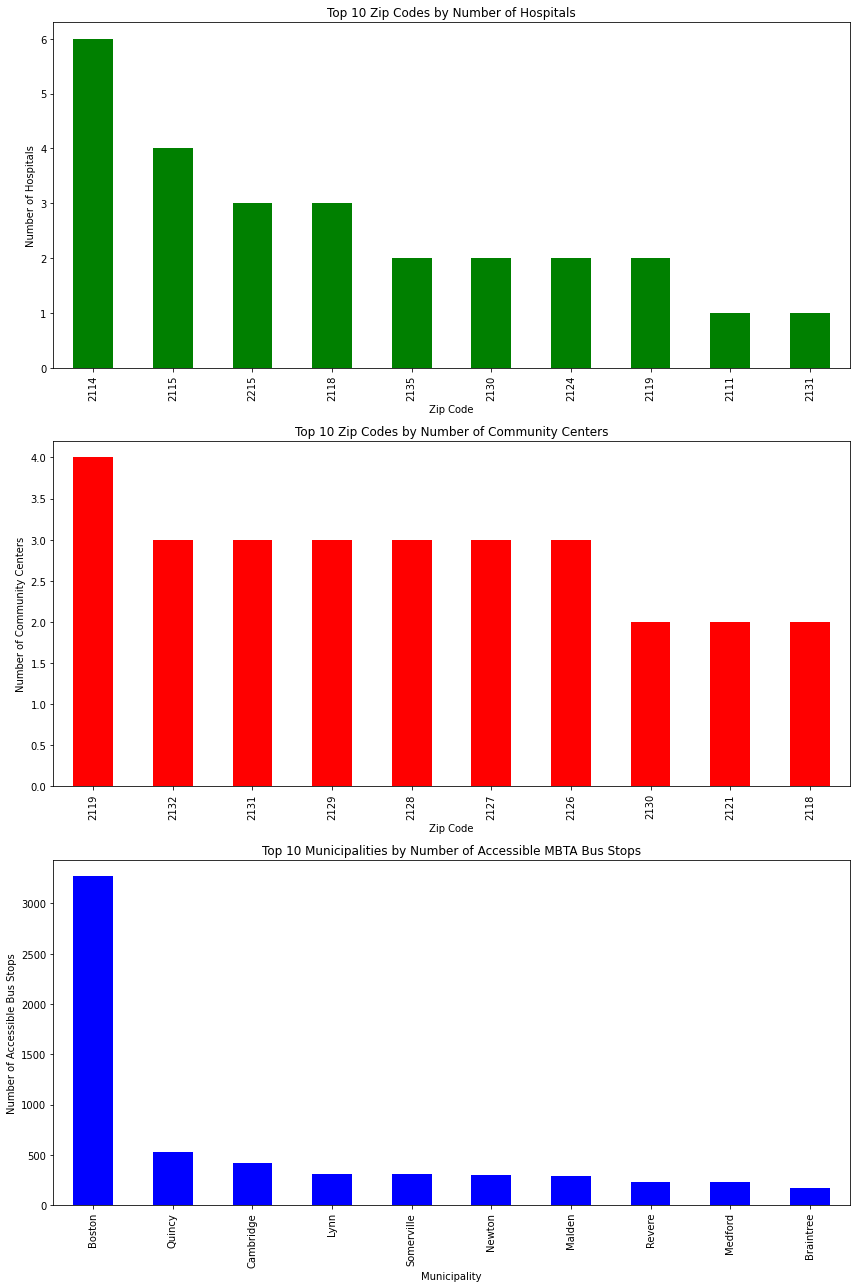

In [11]:
gdf_hospitals = gpd.GeoDataFrame(hospitals_data, geometry=gpd.points_from_xy(hospitals_data.Longitude, hospitals_data.Latitude))
gdf_community_centers = gpd.GeoDataFrame(community_centers_data, geometry=gpd.points_from_xy(community_centers_data.X, community_centers_data.Y))

# Filtering the MBTA data for wheelchair-accessible stops
gdf_accessible_mbta_stops = gdf_mbta[gdf_mbta['wheelchair_boarding'] == 1]
# Grouping the data by neighborhoods or zip codes and counting the number of facilities/stops
# For hospitals and community centers, we will use 'Zipcode' and 'ZIP' respectively for grouping
hospital_counts_by_zip = hospitals_data['Zipcode'].value_counts()
community_center_counts_by_zip = community_centers_data['ZIP'].value_counts()

# For MBTA stops, we will use 'municipality' for grouping
accessible_mbta_counts_by_municipality = gdf_accessible_mbta_stops['municipality'].value_counts()

# Preparing data for bar chart
# Since the zip codes and municipalities may not match exactly, we'll show the top N areas for each category
top_n = 10
top_hospitals = hospital_counts_by_zip.head(top_n)
top_community_centers = community_center_counts_by_zip.head(top_n)
top_accessible_stops = accessible_mbta_counts_by_municipality.head(top_n)

# Creating bar charts
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

top_hospitals.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Top 10 Zip Codes by Number of Hospitals')
axes[0].set_xlabel('Zip Code')
axes[0].set_ylabel('Number of Hospitals')

top_community_centers.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Top 10 Zip Codes by Number of Community Centers')
axes[1].set_xlabel('Zip Code')
axes[1].set_ylabel('Number of Community Centers')

top_accessible_stops.plot(kind='bar', ax=axes[2], color='blue')
axes[2].set_title('Top 10 Municipalities by Number of Accessible MBTA Bus Stops')
axes[2].set_xlabel('Municipality')
axes[2].set_ylabel('Number of Accessible Bus Stops')

plt.tight_layout()
plt.show()


Concentration of Hospitals: Certain zip codes have a notably higher concentration of hospitals, indicating areas that are major healthcare hubs. This information is crucial for understanding which areas might offer better healthcare accessibility, especially for individuals reliant on public transportation.

Availability of Community Centers: The distribution of community centers varies significantly by zip code, with some areas having a dense presence. These centers are essential for local community activities and services, and their accessibility via public transportation is vital for inclusive community engagement.

Accessible Public Transportation: The chart showing the number of accessible bus stops in different municipalities highlights the areas with enhanced public transport accessibility. This is particularly important for individuals with disabilities, as it impacts their ability to access essential services like healthcare and community activities.